In [14]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            print("partial_w printing",partial_w)
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            print("partial_d printing", partial_d)
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
        print("printing y_hat", y_hat)
        print("printing weights", self.weights)
        print("printing bias", self.bias)
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [15]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [16]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [17]:
print(len(y))

442


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
# X_train = np.dot(X_train,1000).astype(int)
# X_test = np.dot(X_test,1000).astype(int)
# y_train = np.dot(y_train,1000).astype(int)
# y_test = np.dot(y_test,1000).astype(int)



(353, 10)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.8516174  -0.10798289 -4.97329188 -3.71099639 -1.31666136 -0.9054897
  3.10988101 -3.27551389 -4.4772849  -3.5094048 ]
partial_d printing -301.3230117669632
partial_w printing [-1.84260129 -0.10666448 -4.96222892 -3.70338801 -1.31955426 -0.90991529
  3.10344557 -3.2725884  -4.46929423 -3.49742562]
partial_d printing -295.2959389985502
partial_w printing [-1.83375978 -0.1053687  -4.95137635 -3.69592283 -1.32238064 -0.91424409
  3.09713025 -3.26970929 -4.4614513  -3.48567562]
partial_d printing -289.3894094140323
partial_w printing [-1.82508937 -0.10409508 -4.94072997 -3.68859799 -1.32514183 -0.91847806
  3.09093263 -3.26687563 -4.45375316 -3.47415023]
partial_d printing -283.60101211664744
partial_w printing [-1.81658664 -0.1028432  -4.93028564 -3.6814107  -1.32783915 -0.92261908
  3.0848

partial_d printing -5.167893085075408
partial_w printing [-1.36531936 -0.01507228 -4.34746954 -3.2694118  -1.39381215 -1.0609317
  2.72874904 -3.04037754 -3.99357036 -2.84220236]
partial_d printing -5.064018764297305
partial_w printing [-1.36489346 -0.01487208 -4.34676111 -3.26885356 -1.39344878 -1.06061311
  2.72822865 -3.0397485  -3.99285771 -2.84150229]
partial_d printing -4.962222030959627
partial_w printing [-1.36447057 -0.0146723  -4.34605631 -3.26829781 -1.39308436 -1.06029297
  2.72771037 -3.03912035 -3.99214765 -2.84080617]
partial_d printing -4.862461332731727
partial_w printing [-1.36405062 -0.01447293 -4.34535508 -3.2677445  -1.39271893 -1.05997131
  2.72719414 -3.03849308 -3.99144014 -2.84011393]
partial_d printing -4.764695948340924
partial_w printing [-1.36363356 -0.01427397 -4.34465734 -3.26719359 -1.3923525  -1.05964817
  2.72667993 -3.03786667 -3.99073512 -2.8394255 ]
partial_d printing -4.668885970951169
partial_w printing [-1.36321931 -0.01407541 -4.34396303 -3.2666

partial_w printing [-1.29987816  0.02357035 -4.22750799 -3.17186012 -1.30911432 -0.98156262
  2.63608331 -2.91521784 -3.86441961 -2.72671619]
partial_d printing -0.04367456411931869
partial_w printing [-1.29960843  0.02374351 -4.22699225 -3.17143583 -1.30871334 -0.98118095
  2.63567777 -2.91465012 -3.86385092 -2.72622538]
partial_d printing -0.04230127294321425
partial_w printing [-1.29933879  0.02391662 -4.22647663 -3.17101164 -1.30831242 -0.98079934
  2.63527233 -2.91408252 -3.86328236 -2.72573469]
partial_d printing -0.04095551799938548
partial_w printing [-1.29906924  0.02408968 -4.22596114 -3.17058754 -1.30791157 -0.98041779
  2.63486699 -2.91351504 -3.86271393 -2.72524415]
partial_d printing -0.039636748544211044
partial_w printing [-1.29879978  0.02426271 -4.22544579 -3.17016355 -1.30751079 -0.9800363
  2.63446174 -2.91294767 -3.86214562 -2.72475374]
partial_d printing -0.03834442484906558
partial_w printing [-1.2985304   0.02443569 -4.22493055 -3.16973965 -1.30711007 -0.9796548

partial_w printing [-1.2454011   0.05857459 -4.12282667 -3.08571646 -1.22772187 -0.90408837
  2.55379458 -2.79999352 -3.74899979 -2.62731487]
partial_d printing 0.02339590583102062
partial_w printing [-1.2451434   0.0587398  -4.12232968 -3.08530755 -1.22733684 -0.90372207
  2.5534043  -2.79944764 -3.74845238 -2.62684385]
partial_d printing 0.023413513587130768
partial_w printing [-1.24488574  0.05890496 -4.12183278 -3.08489871 -1.22695189 -0.90335584
  2.55301409 -2.79890186 -3.74790506 -2.62637292]
partial_d printing 0.02343070147706014
partial_w printing [-1.24462812  0.05907009 -4.12133595 -3.08448993 -1.22656701 -0.9029897
  2.55262394 -2.79835618 -3.74735784 -2.62590207]
partial_d printing 0.023447477909332017
partial_w printing [-1.24437056  0.05923519 -4.1208392  -3.08408122 -1.22618222 -0.90262362
  2.55223386 -2.79781061 -3.74681071 -2.6254313 ]
partial_d printing 0.023463851124250517
partial_w printing [-1.24411305  0.05940025 -4.12034253 -3.08367257 -1.2257975  -0.90225763
 

partial_w printing [-1.19356058  0.09168778 -4.02255782 -3.00324468 -1.15042207 -0.83060254
  2.47515282 -2.69017606 -3.63870746 -2.5324514 ]
partial_d printing 0.0237420430964201
partial_w printing [-1.1933125   0.09184564 -4.02207654 -3.00284896 -1.15005294 -0.83025189
  2.47477584 -2.68965052 -3.63817881 -2.53199687]
partial_d printing 0.02373907626608173
partial_w printing [-1.19306447  0.09200347 -4.02159533 -3.0024533  -1.14968389 -0.82990132
  2.47439892 -2.68912507 -3.63765025 -2.53154243]
partial_d printing 0.02373610328925965
partial_w printing [-1.19281648  0.09216127 -4.0211142  -3.0020577  -1.14931491 -0.82955082
  2.47402207 -2.68859973 -3.63712178 -2.53108806]
partial_d printing 0.023733124299478242
partial_w printing [-1.19256853  0.09231903 -4.02063314 -3.00166217 -1.14894601 -0.8292004
  2.47364528 -2.68807448 -3.6365934  -2.53063378]
partial_d printing 0.023730139427682848
partial_w printing [-1.19232063  0.09247675 -4.02015216 -3.00126671 -1.14857718 -0.82885005
  2

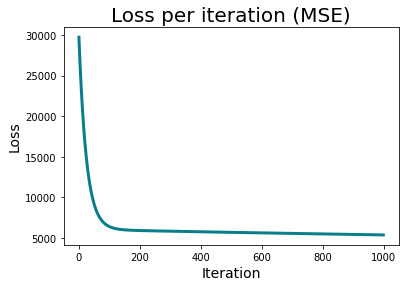

In [20]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.40109818 -0.04224962 -4.42068767 -3.33102525 -1.46173908 -1.12718263
  2.78853908 -3.1298463  -4.07835449 -2.91096596]
partial_d printing 0.030714767988606596
partial_w printing [-1.38678147 -0.03288846 -4.39350601 -3.30861824 -1.44009211 -1.1065055
  2.76704292 -3.0995048  -4.04818504 -2.8849623 ]
partial_d printing 0.026309052926111687
partial_w printing [-1.37259085 -0.02362791 -4.36653167 -3.28638664 -1.41866771 -1.08604887
  2.74572493 -3.06944194 -4.01826796 -2.85917669]
partial_d printing 0.026123232093972184
partial_w printing [-1.35853126 -0.01446781 -4.33977014 -3.26433389 -1.3974615  -1.06580733
  2.72458768 -3.03965681 -3.98860611 -2.83361515]
partial_d printing 0.025938877247229618
partial_w printing [-1.3446015  -0.00540724 -4.31321959 -3.24245844 -1.37647143 -1.04577883
 

partial_w printing [-1.15376585  0.11696063 -3.94523453 -2.93967957 -1.09127642 -0.77444132
  2.41462794 -2.60587399 -3.5538367  -2.45949502]
partial_d printing 0.023228520806313012
printing y_hat [160.58490479 155.88876306 158.75762505 142.19117048 140.64498964
 139.38180762 156.6686104  166.48615113 155.51522392 144.25548063
 145.09266465 158.67196321 147.35235006 166.09268446 144.60721388
 155.95708692 140.97935915 151.49581508 153.54343302 157.77138671
 152.20868911 153.57238595 156.52678615 160.6154553  162.63905757
 159.90657249 153.64763628 150.28728213 151.2521991  143.18487658
 154.00038593 151.20437427 147.45611538 144.66929468 155.49579654
 152.26568764 154.77863038 156.81259867 147.07786712 158.73383832
 141.41345116 157.10297202 144.46376705 160.76042738 161.13628617
 162.40835347 158.10722774 165.92179991 157.78897883 144.18345341
 159.9669618  143.66255272 163.48251818 167.95001469 145.04709524
 165.71302582 163.48303153 153.67970053 163.19626678 158.14361991
 158.755455

 27.49013083 27.66975576 27.58854009 27.58429794 27.60590439]
printing weights [ 0.18180464  0.01030399  0.49320546  0.36826187  0.13273102  0.09218386
 -0.30858662  0.32645008  0.44474503  0.34647683]
printing bias 27.892629853956905


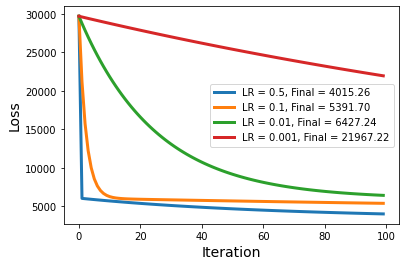

In [8]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
# plt.title('Loss per iteration (MSE) for different learning rates with python decimal operations', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.savefig("python-mse.pdf")
plt.show()

In [9]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.40109818 -0.04224962 -4.42068767 -3.33102525 -1.46173908 -1.12718263
  2.78853908 -3.1298463  -4.07835449 -2.91096596]
partial_d printing 0.030714767988606596
partial_w printing [-1.38678147 -0.03288846 -4.39350601 -3.30861824 -1.44009211 -1.1065055
  2.76704292 -3.0995048  -4.04818504 -2.8849623 ]
partial_d printing 0.026309052926111687
partial_w printing [-1.37259085 -0.02362791 -4.36653167 -3.28638664 -1.41866771 -1.08604887
  2.74572493 -3.06944194 -4.01826796 -2.85917669]
partial_d printing 0.026123232093972184
partial_w printing [-1.35853126 -0.01446781 -4.33977014 -3.26433389 -1.3974615  -1.06580733
  2.72458768 -3.03965681 -3.98860611 -2.83361515]
partial_d printing 0.025938877247229618
partial_w printing [-1.3446015  -0.00540724 -4.31321959 -3.24245844 -1.37647143 -1.04577883
 

3501.717157134028

In [10]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# lr_preds = lr_model.predict(X_test)

# mean_squared_error(y_test, lr_preds)